### Question B, subquestion 1 (B1)

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
# import sounddevice as sd # Can be commented out if it's not installed on your system, it's not necessary for the code to run
from scipy.io import wavfile
import pickle
import os


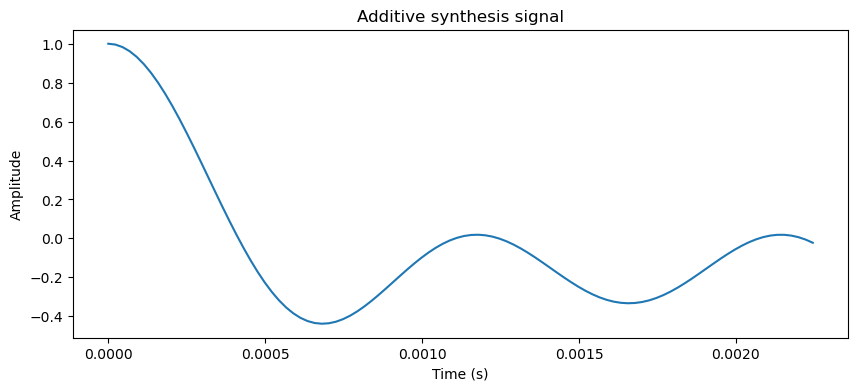

In [2]:

# Code that corresponds to Question B, subquestion 1
# In this code cell, we will define 3 signals with 3 different fundamental frequencies f1, f2 and f3
# With these 3 signals, we will create a new signal using additive synthesis (superposition of the 3 signals)

# First, we define some hyperparameters for our additive synthesis model
fs = 44100 # Sampling rate
Ts = 1 / fs # Sampling period
# duration = 3 # seconds (duration of the signal)
# N = duration * fs # Number of samples
N = 512
duration = N / fs # seconds (duration of the signal)
t = np.linspace(0, duration, N, endpoint = False) # Time vector
# t = np.arange(0, duration, Ts) # Time vector

# We define the 3 fundamental frequencies
f1 = 301.4648 # Hz
f2 = 2 * f1 
f3 = 3 * f1

# All 3 signals should have unit magnitude (normalized amplitude) and no initial phase
s1 = np.cos(2 * np.pi * f1 * t)
s2 = np.cos(2 * np.pi * f2 * t)
s3 = np.cos(2 * np.pi * f3 * t)

# We want to create the new signal using additive synthesis
new_signal = s1 + s2 + s3

# We, first, normalize the signal
new_signal = new_signal / new_signal.max()

# We will, now, play the original signal
# sd.play(new_signal, fs)

# We quantize the signal using 32-bit PCM (not neccessary, again can be commented out)
# new_signal = np.int32(new_signal * (2**31 - 1))

# Since we want the new signal to have a length of 512 samples, we need to interpolate it
# new_t = np.linspace(0, 512 / fs, 512, endpoint = False) # Time vector for the new signal
# new_signal_interp = np.interp(new_t, t, new_signal)


# We, now, play the synthesized signal
# sd.play(new_signal, fs)

# We quantize the signal using 32-bit PCM (not neccessary, again can be commented out)
# new_signal_interp = np.int32(new_signal_interp * (2**31 - 1))

# We optionally save the signal in the 'Sound files' folder
if not os.path.exists('Sound files'):
    os.makedirs('Sound files')

wavfile.write('Sound files/additive_synthesis_signal_B1.wav', fs, new_signal)
# NOTE: We do not intent to replay the synthesized signal in Windows Media Player, so we don't quantize it to 32-bit PCM

# We, now, plot the synthesized signal
plt.figure(figsize = (10, 4))
plt.plot(t[:100], new_signal[:100]) # We plot only the first 100 samples so that it's easier to visualize the signal
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Additive synthesis signal')
plt.show()


# Storing the synthesized signal, and other needed variables, in order to be used by jupyter notebook file "B2.ipynb" to a pickle file
with open('variables.pickle', 'wb') as f:
    pickle.dump({
        'new_signal': new_signal,
        'fs': fs,
        'f1': f1,
        'f2': f2,
        'f3': f3
    }, f)